In [ ]:
!pip install pandas
!pip install openpyxl
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
# Install necessary libraries if not already installed
!pip install pandas matplotlib seaborn plotly ipywidgets

# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Hugo_Symbol          Tumor_Sample_Barcode     One_Consequence
0        FLG2  TCGA-D8-A1XU-01A-11D-A14K-09         stop_gained
1       DNAH7  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
2      ADAM23  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
3      TTC21A  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
4        PHC3  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
5     MAP3K13  TCGA-D8-A1XU-01A-11D-A14K-09  frameshift_variant
6     C5orf51  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
7        MSH5  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
8     DPY19L1  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
9     ST8SIA6  TCGA-D8-A1XU-01A-11D-A14K-09    missense_variant
Hugo_Symbol             0
Tumor_Sample_Barcode    0
One_Consequence         0
dtype: int64
Hugo_Symbol             2886
Tumor_Sample_Barcode      69
One_Consequence   

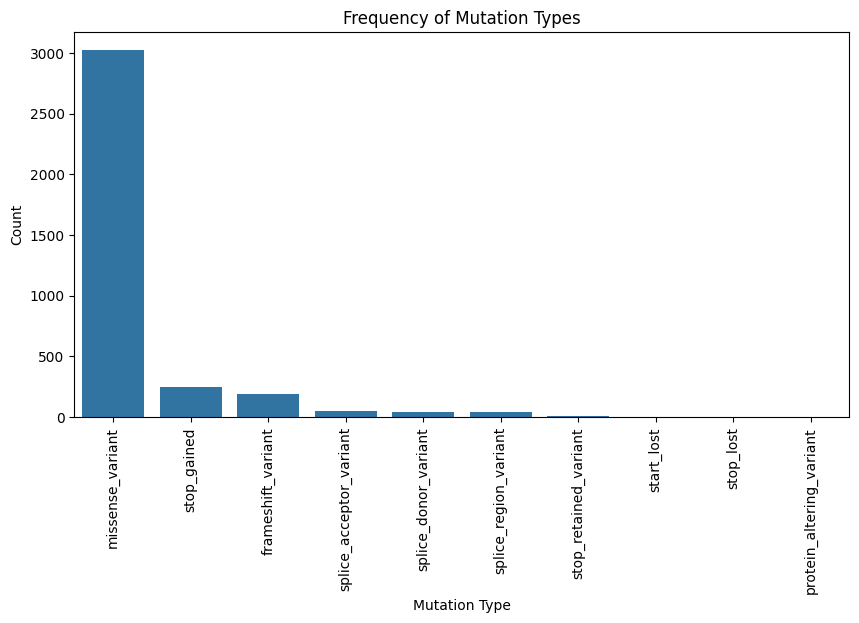

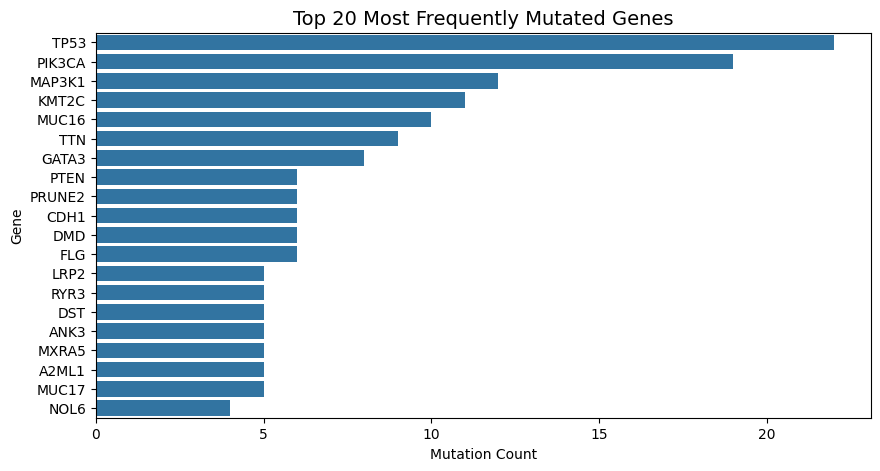

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the file in Google Drive
file_path = "/content/drive/My Drive/BreastCancerData/BRCA_Mutational_reducedmutations.csv"

import pandas as pd
mutation_df = pd.read_csv(file_path)

# Check the first few rows and check for missing values
print("Preview of dataset:")
print(mutation_df.head(10))
print(mutation_df.isnull().sum())
print(mutation_df.nunique())

def plot_mutation_types(mutation_df):

  mutation_counts = mutation_df['One_Consequence'].value_counts()

  # Plot mutation type distribution
  plt.figure(figsize=(10, 5))
  sns.barplot(x=mutation_counts.index, y=mutation_counts.values)
  plt.xticks(rotation=90)
  plt.title("Frequency of Mutation Types")
  plt.xlabel("Mutation Type")
  plt.ylabel("Count")
  plt.show()


def plot_gene_frequency(mutation_df, top_n=20):
  gene_counts = mutation_df["Hugo_Symbol"].value_counts().head(20)

  # Plot layout
  plt.figure(figsize=(10, 5))
  # use seaborn to generate plot
  sns.barplot(x=gene_counts.values, y=gene_counts.index)
  plt.title(f"Top {top_n} Most Frequently Mutated Genes", fontsize=14)
  plt.xlabel("Mutation Count")
  plt.ylabel("Gene")
  plt.show()


# Call the plotting functions to display the graphs
plot_mutation_types(mutation_df)
plot_gene_frequency(mutation_df, top_n=20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-1facbb4bb21b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Hugo_Symbol"] = pd.Categorical(df_filtered["Hugo_Symbol"], categories=sorted_genes, ordered=True)
<ipython-input-6-1facbb4bb21b>:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  oncoplot_data = df_filtered.pivot_table(index="Hugo_Symbol",
<ipython-input-6-1facbb4bb21b>:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `

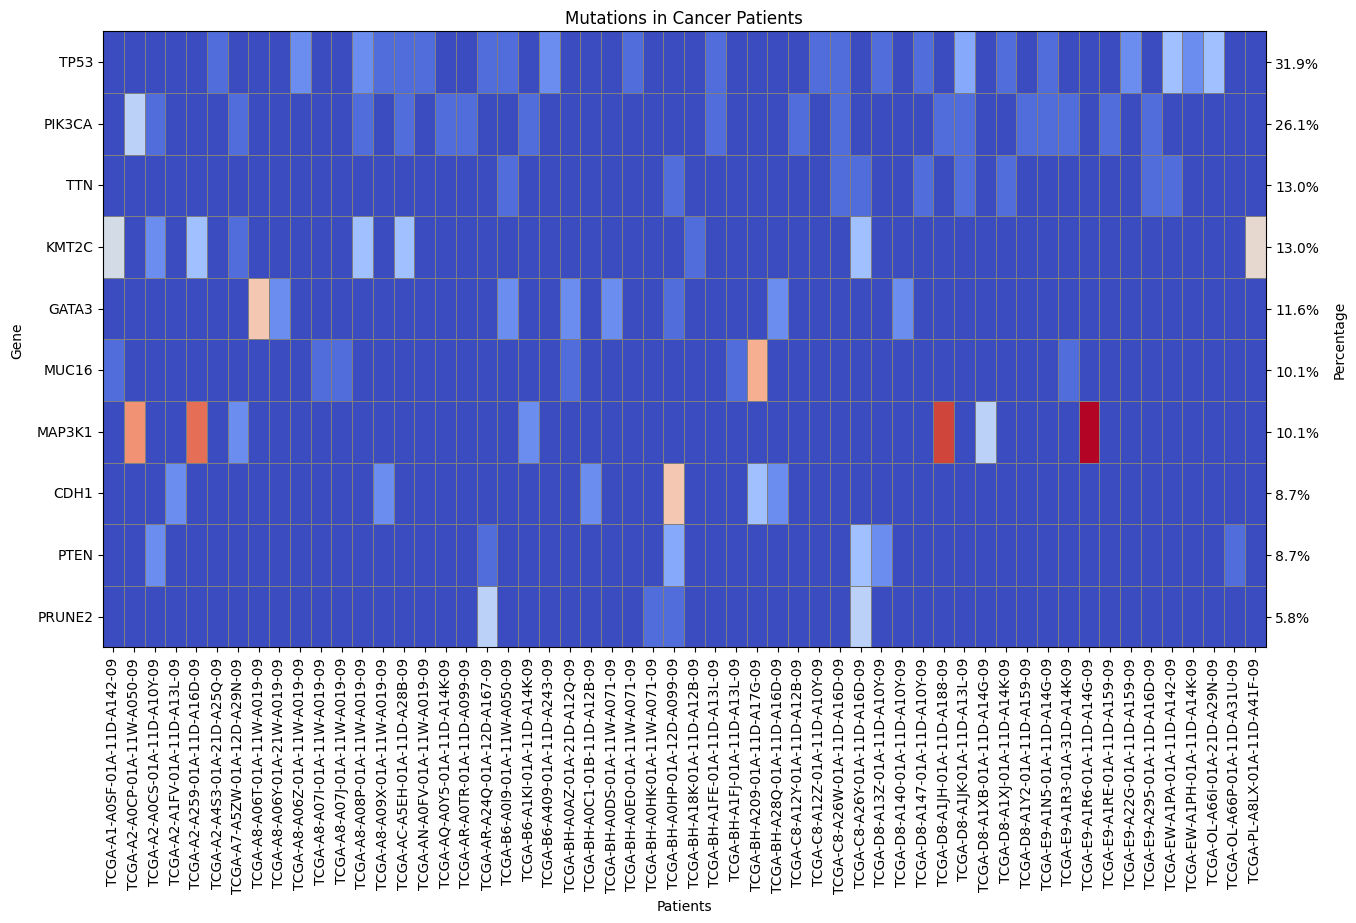

In [ ]:
from google.colab import drive


# Mount Drive
drive.mount('/content/drive')

# Load data
file_path = "/content/drive/My Drive/BreastCancerData/BRCA_Mutational_reducedmutations.csv"
df = pd.read_csv(file_path)

top_genes = df["Hugo_Symbol"].value_counts().index[:10]

# Filtered the dataset to include only those genes
df_filtered = df[df["Hugo_Symbol"].isin(top_genes)]

# calculates mutation percentages
total_patients = df["Tumor_Sample_Barcode"].nunique()
mutation_count = df_filtered.groupby("Hugo_Symbol")["Tumor_Sample_Barcode"].nunique()
mutation_percentage = (mutation_count / total_patients) * 100

# Sorts the genes based on mutation percentages
sorted_genes = mutation_percentage.sort_values(ascending=False).index
mutation_percentage = mutation_percentage.loc[sorted_genes]

df_filtered["Hugo_Symbol"] = pd.Categorical(df_filtered["Hugo_Symbol"], categories=sorted_genes, ordered=True)
df_filtered = df_filtered.sort_values("Hugo_Symbol")

# Pivot table: rows = genes, columns = samples
oncoplot_data = df_filtered.pivot_table(index="Hugo_Symbol",
                                        columns="Tumor_Sample_Barcode",
                                        values="One_Consequence",
                                        aggfunc=lambda x: "; ".join(x)
                                        )

# Replace NaN with "No Mutation"
oncoplot_data = oncoplot_data.fillna("No Mutation")

# Assign a unique integer for each mutation type
mutation_mapping = {mut: i for i, mut in enumerate(oncoplot_data.stack().unique())}

# Replace mutation names with integers
oncoplot_numeric = oncoplot_data.replace(mutation_mapping)
plot_data = oncoplot_numeric.loc[sorted_genes]

# Plot the heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(plot_data, cmap="coolwarm", linewidths=0.5, linecolor="gray", cbar=False)

# Set ticks and labels position so aligned correctly
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()
ax.set_yticklabels(oncoplot_numeric.index, rotation=0)

# Creating secondary y axis for right side to display mutation percentages
ax_left = ax.twinx()
ax_left.set_ylim(ax.get_ylim())
ax_left.set_yticks(ax.get_yticks())
ax_left.set_yticklabels([f"{mutation_percentage[gene]:.1f}%" for gene in sorted_genes])
ax_left.yaxis.set_label_position("right")
ax_left.yaxis.tick_right()

# Adding Labels and titles to the plot
ax.set_xlabel("Patients")
ax.set_ylabel("Percentage")
ax.yaxis.set_label_coords(1.07, 0.5)

ax_left.set_ylabel("Gene")
ax_left.yaxis.set_label_coords(-0.08, 0.5)

plt.title("Mutations in Cancer Patients")
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from google.colab import drive
import plotly.colors
import panel as pn

# Mount Drive
drive.mount('/content/drive')

# Load data from mutation dataset
file_path = "/content/drive/My Drive/BreastCancerData/BRCA_Mutational_reducedmutations.csv"
mutation_data = pd.read_csv(file_path)

# Load data from clinical dataset
clinical_file_path = "/content/drive/My Drive/BreastCancerData/BRCA_Clinical_reduced.csv"
clinical_data = pd.read_csv(clinical_file_path)

mutation_data["Patient_ID"] = mutation_data["Tumor_Sample_Barcode"].str[:12]
clinical_data["Patient_ID"] = clinical_data["bcr_patient_barcode"].str[:12]

# merge both the datasets into one table
merged_data = mutation_data.merge(clinical_data, on="Patient_ID", how="left")

top_genes = mutation_data["Hugo_Symbol"].value_counts().index[:10]
merged_data = mutation_data[mutation_data["Hugo_Symbol"].isin(top_genes)]

# calculates mutation percentages
total_patients = mutation_data["Tumor_Sample_Barcode"].nunique()
mutation_count = merged_data.groupby("Hugo_Symbol")["Tumor_Sample_Barcode"].nunique()
mutation_percentage = (mutation_count / total_patients) * 100

# Sorts the genes based on mutation percentages
sorted_genes = mutation_percentage.sort_values(ascending=False).index
mutation_percentage = mutation_percentage.loc[sorted_genes]

# order merged dataset according to mutation percentages
merged_data["Hugo_Symbol"] = pd.Categorical(merged_data["Hugo_Symbol"], categories=sorted_genes, ordered=True)
merged_data = merged_data.sort_values("Hugo_Symbol")

oncoplot_data = merged_data.pivot_table(index="Hugo_Symbol",
                                        columns="Tumor_Sample_Barcode",
                                        values="One_Consequence",
                                        aggfunc=lambda x: "; ".join(x),
                                        observed=False)

oncoplot_data = oncoplot_data.fillna("No Mutation")

# Assign unique integer values for each mutation type
mutation_mapping = {mut: i for i, mut in enumerate(oncoplot_data.stack().unique())}
oncoplot_numeric = oncoplot_data.replace(mutation_mapping)
oncoplot_numeric_sorted = oncoplot_numeric.loc[sorted_genes]

mutation_types = list(mutation_mapping.keys())

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Define custom colors for each mutation type
custom_colors = {
    "missense_variant": "#1f77b4",  # Blue
    "frameshift_variant": "#ff7f0e",  # Orange
    "splice_donor_variant": "#2ca02c",    # Green
    "stop_gained": "#d62728",    # Red
    "missense_variant; missense_variant": "#9467bd",    # Purple
    "missense_variant; stop_gained": "#8c564b",       # Brown
    "frameshift_variant; stop_gained": "#e377c2",        # Pink
    "splice_acceptor_variant": "#7f7f7f",   # Gray
    "stop_gained; splice_donor_variant": "#bcbd22",  # Yellow-green
    "frameshift_variant; missense_variant": "#17becf",      # Cyan
    "frameshift_variant; frameshift_variant":"#0077ff",
    "missense_variant; missense_variant; missense_variant; missense_variant":"#ffcc00"
}
custom_colors["No Mutation"] = "#D3D3D3"  # Light gray

# USE THIS IF IT IS HARD TO DISTINGUISH NO MUTATION COLOUR ON ONCOPLOT
#custom_colors["No Mutation"] = "#A9A9A9"  # Dark gray

# makes sure each mutation type gets a colour
color_map = {mutation: custom_colors.get(mutation, "#808080") for mutation in mutation_types}
colorscale = [[i / (len(mutation_types) - 1), color_map[mutation]] for i, mutation in enumerate(mutation_types)]

# function to handle updating oncoplot based on different filters
# error handling was done for each filter
def update_oncoplot(mutation_type_to_filter, gene_to_filter, min_age, max_age, vital_status, show_plot=True):

  # filters dataset based on genes
  if gene_to_filter:
    if gene_to_filter and gene_to_filter not in oncoplot_data.index:
      print(f"Error: Gene '{gene_to_filter}' not found in dataset. Please choose from: {list(oncoplot_data.index)}")
      return oncoplot_data, oncoplot_numeric_sorted

    oncoplot_data_filtered = oncoplot_data.loc[[gene_to_filter]]
    oncoplot_numeric_sorted_filtered = oncoplot_numeric_sorted.loc[[gene_to_filter]]

  else:
      oncoplot_data_filtered = oncoplot_data
      oncoplot_numeric_sorted_filtered = oncoplot_numeric_sorted

# filters dataset based on mutation type
  if mutation_type_to_filter:
    mutations_valid = oncoplot_data.stack().unique()
    if mutation_type_to_filter not in mutations_valid:
      print(f"Error: Mutation Type '{mutation_type_to_filter}' not found in dataset.")
      return
    filtered_patients = oncoplot_data.columns[
        (oncoplot_data.isin(mutation_type_to_filter)).any(axis=0)
    ]

    oncoplot_numeric_sorted_filtered = oncoplot_numeric_sorted_filtered[filtered_patients]
    oncoplot_data_filtered = oncoplot_data_filtered[filtered_patients]

# filters dataset based on age
  if min_age is not None or max_age is not None:
      clinical_data["age_at_initial_pathologic_diagnosis"] = pd.to_numeric(
          clinical_data["age_at_initial_pathologic_diagnosis"], errors="coerce"
      )

      valid_ages = clinical_data.copy()
      if min_age is not None:
            valid_ages = valid_ages[valid_ages["age_at_initial_pathologic_diagnosis"] >= min_age]
      if max_age is not None:
            valid_ages = valid_ages[valid_ages["age_at_initial_pathologic_diagnosis"] <= max_age]

      if valid_ages.empty:
        print(f"Error: No patients found in age range {min_age} - {max_age}. ")
        return

      allowed_patients = set(valid_ages["Patient_ID"])
      current_patients = [p for p in oncoplot_data_filtered.columns if p[:12] in allowed_patients]

      oncoplot_data_filtered = oncoplot_data_filtered[current_patients]
      oncoplot_numeric_sorted_filtered = oncoplot_numeric_sorted_filtered[current_patients]

#filters dataset based on vital status
  if vital_status is not None:
    if vital_status not in ["Alive", "Dead"]:
      print(f"Error: incorrect vital status value, Please ensure value is either 'Alive' or 'Dead'")
      return

    valid_vitals = clinical_data[clinical_data["vital_status"] == vital_status]

    if valid_vitals.empty:
      print(f"Error: No patients found with vital status {vital_status}")
      return

    allowed_patients = set(valid_vitals["Patient_ID"])
    current_patients = [p for p in oncoplot_data_filtered.columns if p[:12] in allowed_patients]

    oncoplot_data_filtered = oncoplot_data_filtered[current_patients]
    oncoplot_numeric_sorted_filtered = oncoplot_numeric_sorted_filtered[current_patients]

# hover text feature
  hover_texts_filtered = []
  for gene in oncoplot_numeric_sorted_filtered.index:
      row = []
      for patient in oncoplot_numeric_sorted_filtered.columns:
          mutation_type = oncoplot_data_filtered.loc[gene, patient]

          patient_id = patient[:12]

          # retrieves patients clinical data
          patient_info = clinical_data[clinical_data["Patient_ID"] == patient_id]
          clinical_details = patient_info.to_dict(orient="records")

          hover_text = f"Gene: {gene}<br>Patient: {patient}<br>Mutation: {mutation_type}"

          # Checks if the patient has clinical data, if so adds it to hover text
          if clinical_details:
              for key, value in clinical_details[0].items():
                  hover_text += f"<br>{key}: {value}"

          row.append(hover_text)
      hover_texts_filtered.append(row)

# Generates a heatmap based on the new filtered data
  heatmap = go.Heatmap(
        z=oncoplot_numeric_sorted_filtered.values,
        x=oncoplot_numeric_sorted_filtered.columns,
        y=oncoplot_numeric_sorted_filtered.index,
        colorscale=colorscale,
        text=hover_texts_filtered,
        hoverinfo="text",
        showscale=False,
        xgap=1,
        ygap=1,
    )

  fig.add_trace(heatmap, secondary_y=False)

# invisible scatter plot used to make the legend key
  for mutation, color in custom_colors.items():
      fig.add_trace(
          go.Scatter(
              x=[None], y=[None],
              mode="markers",
              marker=dict(size=10, color=color),
              name=mutation
          )
      )

# correclty aligns the right x axis ticks and labels to the left y axis
  fig.add_trace(
      go.Scatter(
          x=[" "] * len(sorted_genes),
          y=mutation_percentage.index,
          mode="text",
          text=[f"{mutation_percentage[gene]:.1f}%" for gene in sorted_genes],
          textposition="middle right",
          name="Mutation %"
      ),
      secondary_y=True
  )

  # Update layout for the oncoplot
  fig.update_layout(
      title="Interactive Oncoplot with Detailed Hover Data",
      xaxis_title="Patients",
      yaxis=dict(title="Genes", tickmode="array", tickvals=list(range(len(sorted_genes))), ticktext=sorted_genes),
      yaxis2=dict(title="Mutation Percentage", overlaying="y", side="right"),
      legend=dict(title="Mutation Types", x=1, xanchor="left", yanchor="top", y=1)
  )

  if show_plot:
    fig.show()
  return oncoplot_data_filtered, oncoplot_numeric_sorted_filtered


# All the available filtering options
mutation_type_to_filter = None
gene_to_filter = None
min_age = None
max_age = None
vital_status = None

update_oncoplot(mutation_type_to_filter, gene_to_filter, min_age, max_age, vital_status, show_plot=True)

# --------------------------------------------------------------- #
# --------------- TESTING SECTION FOR EACH FILTER --------------- #
"""
# Test 1: Valid gene
print("Test 1: Valid gene filter ('TP53'):")
filtered_data, _ = update_oncoplot(None, 'TP53', None, None, None, show_plot=False)
print(filtered_data.head(5))

# Test 2: Invalid gene
print("------------------------------------------------------------------------")
print("\nTest 2: Invalid gene filter ('INVALIDGENE'):")
filtered_data, _ = update_oncoplot(None, 'FAKEGENE', None, None, None, show_plot=False)
print(filtered_data.head(5))

# Test 3: Valid mutation type
print("------------------------------------------------------------------------")
print("\nTest 3: Mutation type filter ('missense_variant'):")
filtered_data, _ = update_oncoplot(["missense_variant"], None, None, None, None, show_plot=False)
print(filtered_data.head(5))

# Test 4: Age filter
print("------------------------------------------------------------------------")
print("\nTest 4: Age filter (min_age = 50), (max_age= 60)")
filtered_data, _ = update_oncoplot(None, None, 50, 60, None, show_plot=False)
print(filtered_data.head(5))

# Test 5: Vital status filter
print("------------------------------------------------------------------------")
print("\nTest 5: Vital status filter ('Alive'):")
filtered_data, _ = update_oncoplot(None, None, None, None, 'Alive', show_plot=False)
print(filtered_data.head(5))

# Test 6: No filters
print("------------------------------------------------------------------------")
print("\nTest 6: No filters:")
filtered_data, _ = update_oncoplot(None, None, None, None, None, show_plot=False)
print(filtered_data.head(5))
"""

Mounted at /content/drive


<ipython-input-1-b921851c00e1>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data["Hugo_Symbol"] = pd.Categorical(merged_data["Hugo_Symbol"], categories=sorted_genes, ordered=True)
<ipython-input-1-b921851c00e1>:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  oncoplot_numeric = oncoplot_data.replace(mutation_mapping)


'\n# Test 1: Valid gene\nprint("Test 1: Valid gene filter (\'TP53\'):")\nfiltered_data, _ = update_oncoplot(None, \'TP53\', None, None, None, show_plot=False)\nprint(filtered_data.head(5))\n\n# Test 2: Invalid gene\nprint("------------------------------------------------------------------------")\nprint("\nTest 2: Invalid gene filter (\'INVALIDGENE\'):")\nfiltered_data, _ = update_oncoplot(None, \'FAKEGENE\', None, None, None, show_plot=False)\nprint(filtered_data.head(5))\n\n# Test 3: Valid mutation type\nprint("------------------------------------------------------------------------")\nprint("\nTest 3: Mutation type filter (\'missense_variant\'):")\nfiltered_data, _ = update_oncoplot(["missense_variant"], None, None, None, None, show_plot=False)\nprint(filtered_data.head(5))\n\n# Test 4: Age filter\nprint("------------------------------------------------------------------------")\nprint("\nTest 4: Age filter (min_age = 50), (max_age= 60)")\nfiltered_data, _ = update_oncoplot(None, No

In [ ]:
import plotly.express as px

df_mutation_age = df_filtered.merge(clinical_data[['Patient_ID', 'age_at_initial_pathologic_diagnosis']],
                                    on="Patient_ID", how="left")

df_mutation_age = df_mutation_age.dropna(subset=['age_at_initial_pathologic_diagnosis'])

# Create scatter plot
fig = px.scatter(
    df_mutation_age,
    x="age_at_initial_pathologic_diagnosis",
    y="One_Consequence",
    color="One_Consequence",
    hover_data=["Patient_ID", "Hugo_Symbol"],
    title="Age vs Mutation Type",
    height=600,
    width=800
)

fig.update_layout(
    yaxis=dict(title="Mutation Type", categoryorder="category ascending"),
    xaxis=dict(title="Age"),
)

fig.show()

In [ ]:
import plotly.express as px

# Merge mutation data with clinical data to get vital status
df_vital_mutation = df_filtered.merge(
    clinical_data[['Patient_ID', 'vital_status']],
    on="Patient_ID", how="left"
)

mutation_counts = df_vital_mutation["One_Consequence"].value_counts()

df_vital_mutation['One_Consequence'] = pd.Categorical(
    df_vital_mutation['One_Consequence'],
    categories=mutation_counts.index,
    ordered=True
)

fig = px.histogram(
    df_vital_mutation,
    x="One_Consequence",
    color="vital_status",
    barmode="stack",
    text_auto=True,
    title="Distribution of Vital Status by Mutation Type",
    height=600,
    width=800,
    category_orders={"One_Consequence": mutation_counts.index.tolist()}
)

fig.update_layout(
    xaxis_title="Mutation Type",
    yaxis=dict(title="Number of Patients"),
    legend_title="Vital Status"
)

fig.show()



In [ ]:
import plotly.express as px

mutation_counts = df_filtered.groupby(["Hugo_Symbol", "One_Consequence"]).size().reset_index(name="Count")

# Create a stacked bar chart
fig = px.bar(mutation_counts,
             y="Hugo_Symbol",
             x="Count",
             color="One_Consequence",
             title="Mutation Type Distribution in the Top 10 Most Mutated Genes",
             labels={"Count": "Number of Mutations", "Hugo_Symbol": "Gene"},
             barmode="stack",
             orientation="h",
             width=800,
             height=600)

fig.show()

<ipython-input-10-d6264312fb4a>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



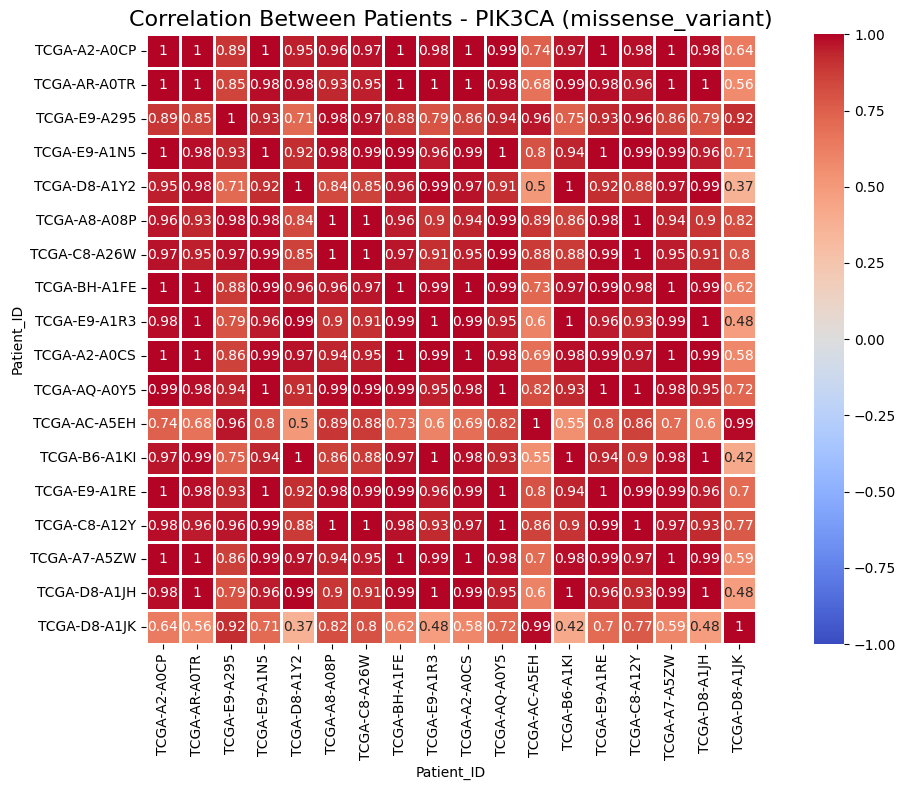

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_patient_correlation(mutation_filter, target_gene):

    # retreives a list of all the patients who have the selected mutation in the specified gene
    gene_mutations = mutation_data[
        (mutation_data['Hugo_Symbol'] == target_gene) &
        (mutation_data['One_Consequence'].str.contains(mutation_filter, na=False))
    ]

    if gene_mutations.empty:
        print(f"No matching mutations found for {target_gene} with filter '{mutation_filter}'.")
        return

    patients = gene_mutations['Patient_ID'].unique()

    #gets all the patients IDs who are in the gene_mutation list
    patient_mutations = mutation_data[mutation_data['Patient_ID'].isin(patients)]
    patient_clinical = clinical_data[clinical_data['Patient_ID'].isin(patients)]

    if patient_clinical.empty:
        print(f"No clinical data available for selected patients.")
        return

    combined_data = patient_mutations.merge(patient_clinical, on="Patient_ID", how="left")

    # Manually assign values to categorical data in vital status and gender columns
    combined_data['Vital_Status'] = combined_data["vital_status"].map({'Alive': 0, 'Dead': 1})
    combined_data['Gender'] = combined_data['gender'].map({'FEMALE': 0, 'MALE': 1})

    mutation_counts = patient_mutations.groupby('Patient_ID').size().rename('Total_Mutations')

    # selects relevant columns and creates a new dataframe
    # Patients_ID columns is set as the index
    patient_info = combined_data[['Patient_ID', 'Vital_Status', 'Gender', 'age_at_initial_pathologic_diagnosis']]
    patient_info = patient_info.drop_duplicates('Patient_ID').set_index('Patient_ID')

    patient_info = patient_info.join(mutation_counts)

    # Makes the correlation matrix
    correlation = patient_info.transpose().corr()

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(correlation, ax=ax, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                square=True, linewidths=1)
    ax.set_title(f"Correlation Between Patients - {target_gene} ({mutation_filter})", fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_patient_correlation("missense_variant", "PIK3CA")